In [1]:
# I am Excited about the project on Capstone Neighborhood Analysis.

In [2]:
print("Data Analysis Project")

Data Analysis Project


In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [4]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-12-10 02:30:41--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.1s    

2020-12-10 02:30:42 (227 KB/s) - ‘loan_train.csv’ saved [23101/23101]



# Loading Data from CSV 

In [5]:
loan_data = pd.read_csv('loan_train.csv')
loan_data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [6]:
loan_data.shape

(346, 10)

# Converting to Date Time Object

In [7]:
loan_data['due_date'] = pd.to_datetime(loan_data['due_date'])
loan_data['effective_date'] = pd.to_datetime(loan_data['effective_date'])
loan_data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data Visualizing and Pre-Processing

In [8]:
loan_data['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [9]:
!conda install -c anaconda seaborn -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |             main           3 KB  anaconda
    _py-xgboost-mutex-2.0      |            cpu_0           9 KB  anaconda
    _pytorch_select-0.1        |            cpu_0           2 KB  anaconda
    absl-py-0.10.0             |           py37_0         169 KB  anaconda
    aiohttp-3.6.3              |   py37h7b6447c_0         626 KB  anaconda
    argon2-cffi-20.1.0         |   py37h7b6447c_1         

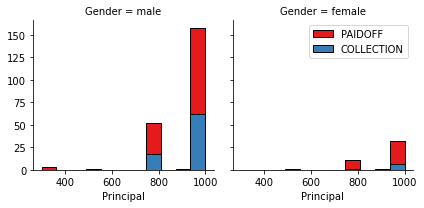

In [16]:
import seaborn as sns

bins = np.linspace(loan_data.Principal.min(), loan_data.Principal.max(), 12)
g = sns.FacetGrid(loan_data, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

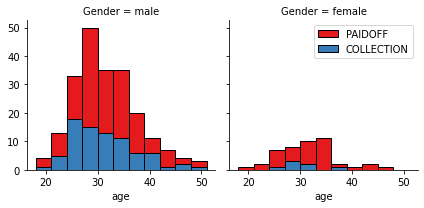

In [15]:
bins = np.linspace(loan_data.age.min(), loan_data.age.max(), 12)
g = sns.FacetGrid(loan_data, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Data Preprocessing

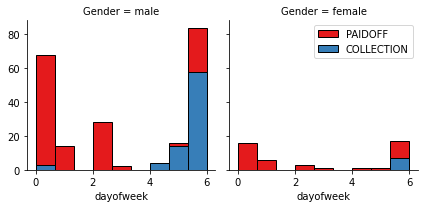

In [14]:
loan_data['dayofweek'] = loan_data['effective_date'].dt.dayofweek
bins = np.linspace(loan_data.dayofweek.min(), loan_data.dayofweek.max(), 10)
g = sns.FacetGrid(loan_data, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [13]:
loan_data['weekend'] = loan_data['dayofweek'].apply(lambda x: 1 if (x>3) else 0)
loan_data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


# Converting into Numerical values

In [17]:
# Gender into Numerical value
loan_data.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [22]:
loan_data['Gender'].replace(1, 'Female')
loan_data['Gender'].replace(0, 'Male')
loan_data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


# Grouping by Education and Loan Status

In [23]:
loan_data.groupby(['education'])['loan_status'].value_counts(normalize = True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [24]:
loan_data[['education', 'terms', 'Gender', 'age', 'Principal']].head()

,education,terms,Gender,age,Principal
0,High School or Below,30,0,45,1000
1,Bechalor,30,1,33,1000
2,college,15,0,27,1000
3,college,30,1,28,1000
4,college,30,0,29,1000


In [25]:
Feature = loan_data[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(loan_data['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [28]:
X = Feature
X[:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [29]:
# Lets check our labels.

In [31]:
y = loan_data['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

# Normalizing the Data

In [32]:
X =  preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification of the models. I am building a appropriate model using following Algorithms:

# K Nearest Neighbor (KNN)

In [33]:
# Now i am spliting the train and test datasts.


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [35]:
# now, Finding the best value of X:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

K = 15
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))
for n in range(1,K):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.67142857, 0.65714286, 0.71428571, 0.68571429, 0.75714286,
       0.71428571, 0.78571429, 0.75714286, 0.75714286, 0.67142857,
       0.7       , 0.72857143, 0.7       , 0.7       ])

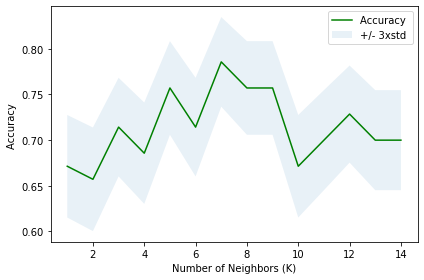

In [36]:
# Plotting the Accuracy of the values
plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [37]:
#Looking at the plot we can see that best value of K is 7
neigh = KNeighborsClassifier(n_neighbors = 7).fit(X_train,y_train)
yhat=neigh.predict(X_test)
print("KNN Accuracy is : ", metrics.accuracy_score(y_test, yhat))

KNN Accuracy is :  0.7857142857142857


# Decision Tree

In [38]:
#train decision tree model
from sklearn.tree import DecisionTreeClassifier
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
loanTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [41]:
preddata = loanTree.predict(X_test) #Predecting target Variable

In [42]:

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, preddata))

DecisionTrees's Accuracy:  0.7714285714285715


# Support Vector Machine Algorithm

In [43]:
from sklearn import svm
acc_score = np.zeros(3)
n = 0

for kernel in ('linear', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    svm_yhat = clf.predict(X_test)
    acc_score[n] = metrics.accuracy_score(y_test, svm_yhat)
    n = n + 1

acc_score

array([0.78571429, 0.77142857, 0.74285714])

In [44]:
# We can see from the acc_score array above the linear kernel has best accuracy!

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
svm_yhat = clf.predict(X_test)
svm_yhat [:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [45]:
print(f"The SVM Accuracy is: {metrics.accuracy_score(y_test, svm_yhat)}")

SVM Accuracy is: 0.7857142857142857


# Logistic Regression

In [46]:

from sklearn.linear_model import LogisticRegression
#find optimal solver parameter
LR_accu = np.zeros(5)
n = 0

for solver in ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga' ):
    LR = LogisticRegression(C=0.01, solver=solver)
    LR.fit(X_train, y_train)
    LR_yhat = LR.predict(X_test)
    LR_accu[n] = metrics.accuracy_score(y_test, LR_yhat)
    n = n + 1

LR_accu

array([0.78571429, 0.78571429, 0.68571429, 0.78571429, 0.78571429])

In [47]:
LR = LogisticRegression(C=0.01, solver='lbfgs')
LR.fit(X_train, y_train)
LR_yhat = LR.predict(X_test)
LR_yhat[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [48]:
print(f"Logistic Regression Accuracy: {metrics.accuracy_score(y_test, LR_yhat)}")

Logistic Regression Accuracy: 0.7857142857142857


# Model Evaluation Using Test Set

In [50]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [51]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-12-10 03:35:31--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2020-12-10 03:35:31 (38.2 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [52]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


# Data Conversions

In [56]:
#convert to date object
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

#add day of week and weekend columns
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

#convert Gender column to binary
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

Feature_df = test_df[['Principal','terms','age','Gender','weekend']]
Feature_df = pd.concat([Feature_df,pd.get_dummies(test_df['education'])], axis=1)
Feature_df.drop(['Master or Above'], axis = 1,inplace=True)
Feature_df.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [62]:

Test_X = Feature_df
Test_y = test_df['loan_status'].values

#predict using different algo's
#KNN
KNN_yhat = neigh.predict(Test_X)

#Decision Trees
DT_yhat = loanTree.predict(Test_X)

#SVM
SVM_yhat = clf.predict(Test_X)

#Logistic Trees
Log_yhat = LR.predict(Test_X)

In [73]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import jaccard_score, f1_score, log_loss

mlb = MultiLabelBinarizer()
mlb.fit(Test_y)

KNN_fs = f1_score(mlb.transform(Test_y), mlb.transform(KNN_yhat), average='micro')
DT_fs = f1_score(mlb.transform(Test_y), mlb.transform(DT_yhat), average='micro')
SVM_fs = f1_score(mlb.transform(Test_y), mlb.transform(SVM_yhat), average='micro')
LG_fs = f1_score(mlb.transform(Test_y), mlb.transform(Log_yhat), average='micro')

yhat_proba = LR.predict_proba(Test_X)
Accuracy = {'Algorithm': ['KNN','Decision Tree','SVM','LogisticRegression'],
             'Jaccard':[jaccard_score(Test_y, KNN_yhat,pos_label="PAIDOFF"), jaccard_score(Test_y, DT_yhat,pos_label="PAIDOFF"),
                       jaccard_score(Test_y, SVM_yhat,pos_label="PAIDOFF"),jaccard_score(Test_y, Log_yhat,pos_label="PAIDOFF")],
            'F1-score':[KNN_fs, DT_fs, SVM_fs, LG_fs],
            'LogLoss':['NA', 'NA', 'NA',log_loss(Test_y, yhat_proba)]}

Report_df = pd.DataFrame(Accuracy)
Report_df.set_index('Algorithm',inplace = True)

Report_df = Report_df[['Jaccard','F1-score','LogLoss']]

Report_df

,Jaccard,F1-score,LogLoss
Algorithm,,,
KNN,0.740741,0.809668,NA
Decision Tree,0.680851,0.800591,NA
SVM,0.740741,0.809668,NA
LogisticRegression,0.000000,0.497207,16.8619


In [ ]:
Conclusion, Looking at the outcome of different algorithmic scores it is understood that the chance of loan payment case will be paid off.